In [ ]:
import numpy as np
import pandas
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


This time let us focus on a generated toy dataset. After all at the current stage your instructor cannot scare away any more students (in theory)

In [ ]:
x1 = np.random.normal(size=200) 
x2 = np.linspace(-5, 5, 200)
y = 3+ 4*x1+5*x2 + np.random.normal(size=200)
data = pandas.DataFrame({'predictor 1': x1, 'predictor 2': x2, 'response': y})
data.head()

,predictor 1,predictor 2,response
0,-0.484444,-5.000000,-23.972296
1,-2.541270,-4.949749,-32.792703
2,0.507439,-4.899497,-19.620684
3,0.255458,-4.849246,-18.673486
4,1.986080,-4.798995,-13.947027


Text(0.5, 1.0, 'y v.s. x1')

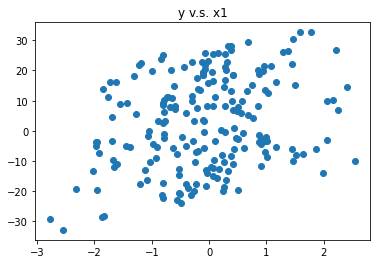

In [ ]:
# scatter plot
plt.scatter(x1,y)
plt.title('y v.s. x1')

Text(0.5, 1.0, 'y v.s. x2')

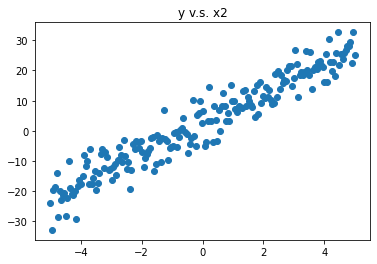

In [ ]:
# scatter plot again
plt.scatter(x2,y)
plt.title('y v.s. x2')

Now create your own design matrix

In [ ]:
x = data[['predictor 1','predictor 2']]
print(x.shape)
x = statsmodels.tools.tools.add_constant(x)
print(x.shape)

(200, 2)
(200, 3)


Now we fit in the multivariate linear regression model

In [ ]:
model = sm.OLS(y, x).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.192e+04
Date:                Wed, 13 Oct 2021   Prob (F-statistic):          3.94e-232
Time:                        17:16:26   Log-Likelihood:                -284.66
No. Observations:                 200   AIC:                             575.3
Df Residuals:                     197   BIC:                             585.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.9991      0.072     41.813      

#Difference between $Q = \sum_{i=1}^n (y_i - x_i^\top \beta)^2$ and $RSS = \sum_{i=1}^n(y_i - x_i^\top b)^2$

Generally speaking, we do not know $\beta$. Nevertheless, we have 
$$
RSS = \sum_{i=1}^n(y_i - x_i^\top b)^2 \leq Q = \sum_{i=1}^n (y_i - x_i^\top \beta)^2. 
$$

In our model we know the ground truth of $\beta$ (because that's how we generated the data). But even that, $RSS \leq Q$.


Q= 205.58057740608382 RSS= 201.74606388795576


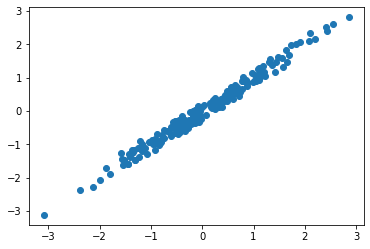

In [ ]:
# Check 
eps = (y-3-4*x1-5*x2)
Q   = np.sum(eps**2)
# print(model.params)
e   = y - model.predict(x)
RSS = np.sum(e**2)
plt.scatter(e,eps)
print("Q=",Q,"RSS=",RSS)

#Construct a double-sided confidence interval with significance level $\alpha$

For $\alpha = 95\%$, we can directly read from the table that the confidence interval for $\beta_1$ is $[3.909,4.184]$.


For $\alpha = 99\%$, we have to somehow created by hand:$[3.865, 4.229]$

In [ ]:
# # 99% CI
# print(t.ppf(0.995, 197))
# print(stats.norm.ppf(0.995))
# calculation of lower bounds for CI
print(4.0466-0.070*2.6010156416609598)
# calculation of upper bounds for CI
print(4.0466+0.070*2.6010156416609598)

# 95% CI


3.8645289050837324
4.228671094916267


#Construct a single-sided confidence interval with significance level $\alpha$

$\alpha =99\%$, single-sided CI:

In [ ]:
print(t.ppf(0.99, 197))
print(4.0466-0.070*2.3454254493836264)

2.3454254493836264
3.882420218543146


#Hyposthesis testing for $\beta_1 = 0$

Suppose you didn't see how I generated the data. 
The first thing we are interested in is to see if $\beta_1 =0$, which means you should write down the hypothesis for testing:
$$
H_0: \beta_1 =0 \qquad \mathrm{v.s.}\qquad  H_1: otherwise
$$

We can do it with Wald test. The associated $T$-statistics is 
$$
T =  \frac{\widehat{\beta}_1}{se({\widehat\beta_1})}
$$





In [ ]:
print(4.0466/0.070)

57.80857142857142


#Hyposthesis testing for $\beta_1 = 4$

Now you want to see if $\beta_1 =4$, which means you should write down the hypothesis for testing:
$$
H_0: \beta_1 =4 \qquad \mathrm{v.s.}\qquad  H_1: otherwise
$$

We can do it with Wald test.

 The associated $T$-statistics is 
$$
T =  \frac{\widehat{\beta}_1-4}{se({\widehat\beta_1})}
$$




In [ ]:
print((4.0466-4)/0.070)

0.6657142857142822


#Hyposthesis testing for $\beta_1 \geq 3$

Suppose you didn't see how I generated the data. 
The first thing we are interested in is to see if $\beta_1$ is larger than 3, which means you should write down the hypothesis for testing:
$$
H_0: \beta_1 \geq 3 \qquad \mathrm{v.s.}\qquad  H_1: otherwise
$$

We can do it with Wald test. The associated $T$-statistics is 
$$
T =  \frac{\widehat{\beta}_1-3}{se({\widehat\beta_1})}
$$





In [1]:
print((4.06-3)/0.07)

15.142857142857135


#Hyposthesis testing for $\beta_1 \leq 3$

Suppose you didn't see how I generated the data. 
The first thing we are interested in is to see if $\beta_1$ is larger than 3, which means you should write down the hypothesis for testing:
$$
H_0: \beta_1 \leq 3 \qquad \mathrm{v.s.}\qquad  H_1: otherwise
$$

We can do it with Wald test. The associated $T$-statistics is 
$$
T =  \frac{\widehat{\beta}_1-3}{se({\widehat\beta_1})}
$$





In [ ]:
print((4.06-3)/0.07)

15.142857142857135


#Hyposthesis testing for $\beta_1 = \beta_2=0$

Suppose you didn't see how I generated the data. 
The first thing we are interested in is to see if $\beta_1 =\beta_2=0$, which means you should write down the hypothesis for testing:
$$
H_0: \beta_1 =\beta_2=0 \qquad \mathrm{v.s.}\qquad  H_1: otherwise
$$

How shall we do it?

1. Wald test. 

2. F test.


In [ ]:
# Application of Bonferroni inequality to statistics

Suppose we have $g$ different confidence intervals, each with confidence level $1 - \alpha$.  

Let $$A_i =  \left\{ i \text{th interval fails to cover the true value} \right\} $$

The simultaneous confidence level is \\
$$
P( \text{all intervals do cover} ) = P(A_1 ' \cap A_2 ' \cap \cdots \cap A_g ' )$$
so
$$ P( \text{all intervals cover} )   \geq 1 - P(A_1') - P(A_2') - \cdots - P(A_g') $$ or 
$$ P( \text{all intervals cover} ) \geq  1 - \alpha - \alpha - \cdots - \alpha = 1 - g \alpha $$

That is, individual $1 - \alpha$ confidence intervals give us a simultaneous confidence level 
of at least $1 - g \alpha$.  

So what if we want simultaneous $1 - \alpha$ confidence?

Make sure each interval has an individual confidence level of $1 - \alpha / g$! --> Bonferroni method!


#Wald test

$$
H_0: \beta_1 =\beta_2=0 \qquad \mathrm{v.s.}\qquad  H_1: \mathrm{otherwise}
$$

In [ ]:
# 90% confidence set for (beta_1, beta_2) = 95% CI for beta_1 and 95% CI for beta_2


#F test

$$
H_0: \beta_1 =\beta_2=\cdots = \beta_{p-1}=0 \qquad \mathrm{v.s.}\qquad  H_1: \mathrm{otherwise}
$$

For a multivariate linear regression model with design matrix as $n\times p$, then

$$
SS_{\mathrm{total}} = SS_{\mathrm{reg}} + RSS, \qquad RSS \perp SS_{\mathrm{reg}}. 
$$

1. the degree of freedom for RSS is $n-p$
2. the degree of freedom for $SS_{\mathrm{total}} = \sum_{i=1}^n (Y_i - \bar{Y})^2$ is $n-1$
3. the degree of freedom for $SS_{\mathrm{reg}} = \sum_{i=1}^n(\widehat{Y}_i - \bar{Y})^2$ is $n-1 - (n-p)=p-1$. 

Test statistics: 
$$
F= \frac{SS_{reg}/(p-1)}{RSS/(n-p)} 
$$

In [ ]:
SS_reg = np.sum((y-np.mean(y))**2)-RSS
print((SS_reg/2)/(RSS/197))

21916.553916250654
